In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Function import Norm_sph_harmonics
from wavefunctions import R_3_2, Y_phi, Y_theta, R_3_0, R_3_1
from math import pi
from Plot import prob_wt_cal
from random import randint,uniform,choices
import pandas as pd

In [2]:
n = 3
l = 1
m = 0
a = 2e-10
r0 = 0
rm = 5.5e-9
N_theta = 1
N_phi = 1

def mod_r(r):
    return R_3_1(r,a)

def mod_Y_theta(theta):
    return Y_theta(theta,l,m,N_theta)

def mod_Y_phi(phi):
    return Y_phi(phi,m,N_phi)

In [3]:
N_theta, N_phi = Norm_sph_harmonics(mod_Y_theta,mod_Y_phi,(0,pi),(0,2*pi))

In [4]:
parts = 30
wt_r,wt_theta,wt_phi = prob_wt_cal(mod_r,mod_Y_theta,mod_Y_phi,(r0,rm),(0,pi),(0,2*pi),parts)

In [5]:
dis_r = np.linspace(r0,rm,parts+1)[:-1]
dis_theta = np.linspace(0,pi,parts+1)[:-1]
dis_phi = np.linspace(0,2*pi,parts+1)[:-1]

itr = 20000
coord = np.zeros((1,3))
for i in range(itr):
    lucky_r = choices(dis_r,wt_r) + uniform(dis_r[0],dis_r[1])
    lucky_theta = choices(dis_theta,wt_theta) +uniform(dis_theta[0],dis_theta[1])
    lucky_phi = choices(dis_phi,wt_phi) +uniform(dis_phi[0],dis_phi[1])
    coord = np.concatenate((coord,np.array([[lucky_r,lucky_theta,lucky_phi]]).reshape(1,3)),axis=0)

coord = coord[1:,:]

In [6]:
jum = coord.shape[0]
cart_coord = np.zeros((jum,3))

cart_coord[:,0] = coord[:,0] * np.sin(coord[:,1]) * np.cos(coord[:,2])
cart_coord[:,1] = coord[:,0] * np.sin(coord[:,2]) * np.sin(coord[:,1])
cart_coord[:,2] = coord[:,0] * np.cos(coord[:,1]) 


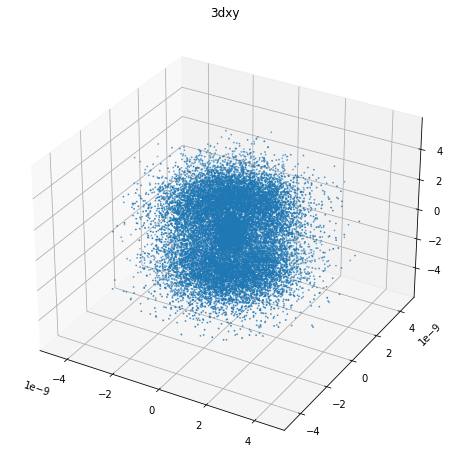

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
plt.xlim(-5e-9,5e-9)
plt.ylim(-5e-9,5e-9)
plt.title('3dxy')

ax.scatter3D(cart_coord[1:,0],cart_coord[1:,1],cart_coord[1:,2],s=0.7)

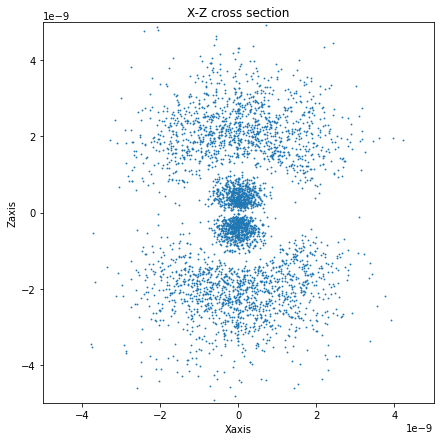

In [8]:
hanny = np.array([[0,0]])
for i in range(jum):
    if -0.25e-9<cart_coord[i,1]<0.25e-9:
        hanny = np.concatenate((hanny,np.array([[cart_coord[i,0],cart_coord[i,2]]])),axis=0)




fig = plt.figure(figsize=(7,7),facecolor=(1,1,1))
ax = fig.add_subplot(111)
ax.scatter(hanny[:,0],hanny[:,1],s=0.7)
#ax.scatter(cart_coord[:,0],cart_coord[:,2],s =0.5)
plt.xlim(-5e-9,5e-9)
plt.ylim(-5e-9,5e-9)
plt.title('X-Z cross section')
plt.xlabel('Xaxis')
plt.ylabel('Zaxis')
plt.savefig('3d0.png')

In [9]:
pd.DataFrame(cart_coord).to_csv('3d_data_0.csv')